# Avance #2 API YELP


# 1. Conexión codigo Pre-armado Henry
Conectarse a la API de Yelp para obtener información de negocios locales de una ciudad (elegida de la base de datos del avance anterior). Como ya se definio en el avance uno la ciudad elegida fue MIAMI. A continuación se expresa el codigo pre-armado de Henry para trabajar como parte del avance.

In [4]:
import pandas as pd
import requests
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)# Muestra todas las columnas y filas al imprimir DataFrames.

> la apikey es la autenticación real no requiere del cliente ID. como recomendación de seguridad, no se comparte esta clave públicamente, para ello se usan variables de entorno o archivos de configuración seguros. mas adelante se explicara como se realizo este tratamiento.


In [6]:
#url de la API
api_url='https://api.yelp.com/v3/businesses/search'

import os # Importar el módulo os para manejar variables de entorno
apikey=os.getenv('YELP_API_KEY') # Obtener la clave API desde una variable de entorno por seguridad
print(apikey is not None) # Verificar que la clave API se haya obtenido correctamente

#estos datos corresponden a una cuenta de usuario creada previamente
clientid='GWOCZh9-BmZxtdsAjr7Gug'
apikey='FHVvXoNmTXIl9DuxYis7AV5uLPujm9MLwrhgs5NgvCfaOxd3V6mxt6dQU8eEqYJiGxe816XATx7ufWjbMWqbV-2Uku1jxBJv8BGRC74NroLPl27PDQqs0tDixit-YHYx'
headers={'Authorization':'Bearer %s'%apikey}

True


In [7]:
ciudad = "Miami" # Ciudad elegida

In [8]:
# De esta manera se consulta el API de Yelp para obtener información sobre restaurantes en la ciudad especificada
offset = 0  # Inicializar el offset para la paginación
params={'term':'restaurants','location': ciudad,'limit':50, 'offset': offset} # Parámetros de la consulta, incluyendo paginación con 'offset'
response=requests.get(api_url,params=params,headers=headers)
data=response.json()
data


{'businesses': [{'id': 'K3ukx2e11xTRtYBU01dmrA',
   'alias': 'salty-flame-miami',
   'name': 'Salty Flame',
   'image_url': 'https://s3-media0.fl.yelpcdn.com/bphoto/_6wShTvzfucB5dxFZv4Mpg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/salty-flame-miami?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
   'review_count': 231,
   'categories': [{'alias': 'asianfusion', 'title': 'Asian Fusion'},
    {'alias': 'steak', 'title': 'Steakhouses'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.3,
   'coordinates': {'latitude': 25.76022, 'longitude': -80.19267},
   'transactions': ['pickup', 'delivery'],
   'location': {'address1': '1414 Brickell Ave',
    'address2': None,
    'address3': '',
    'city': 'Miami',
    'zip_code': '33131',
    'country': 'US',
    'state': 'FL',
    'display_address': ['1414 Brickell Ave', 'Miami, FL 33131']},
   'phone': '+1305563897

In [9]:
#Veamos los keys del diccionario recibido
data.keys()

dict_keys(['businesses', 'total', 'region'])

In [10]:
#El primer elemento del diccionario indica el total de restaurants existentes en la API
print('En total la base de datos registra %d restaurants'%data['total'])

En total la base de datos registra 5700 restaurants


In [11]:
data['businesses'] # Hasta acá se le entregaría a los estudiantes

[{'id': 'K3ukx2e11xTRtYBU01dmrA',
  'alias': 'salty-flame-miami',
  'name': 'Salty Flame',
  'image_url': 'https://s3-media0.fl.yelpcdn.com/bphoto/_6wShTvzfucB5dxFZv4Mpg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/salty-flame-miami?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
  'review_count': 231,
  'categories': [{'alias': 'asianfusion', 'title': 'Asian Fusion'},
   {'alias': 'steak', 'title': 'Steakhouses'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
  'rating': 4.3,
  'coordinates': {'latitude': 25.76022, 'longitude': -80.19267},
  'transactions': ['pickup', 'delivery'],
  'location': {'address1': '1414 Brickell Ave',
   'address2': None,
   'address3': '',
   'city': 'Miami',
   'zip_code': '33131',
   'country': 'US',
   'state': 'FL',
   'display_address': ['1414 Brickell Ave', 'Miami, FL 33131']},
  'phone': '+13055638972',
  'display_phone': '(305) 563-89

## 1.1 Exploración API

In [12]:
data['total'] # 

5700

In [13]:
data['region'] # 

{'center': {'longitude': -80.2880859375, 'latitude': 25.752753731496888}}

In [14]:
data['businesses'][0]['categories'] # muestra las categorias o tipo de restaurante

[{'alias': 'asianfusion', 'title': 'Asian Fusion'},
 {'alias': 'steak', 'title': 'Steakhouses'},
 {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]

In [15]:
data['businesses'][1] # Mostrar el segundo negocio en la lista de negocios devueltos


{'id': 'UXHxLN3DcDGI57uDIfCuJA',
 'alias': 'olds-havana-cuban-bar-and-cocina-miami',
 'name': "Old's Havana Cuban Bar & Cocina",
 'image_url': 'https://s3-media0.fl.yelpcdn.com/bphoto/OyMD-xvBjobfDmDdBs2Jfw/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/olds-havana-cuban-bar-and-cocina-miami?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
 'review_count': 3122,
 'categories': [{'alias': 'cuban', 'title': 'Cuban'},
  {'alias': 'bars', 'title': 'Bars'},
  {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
 'rating': 4.4,
 'coordinates': {'latitude': 25.765607074496565,
  'longitude': -80.21921771559332},
 'transactions': ['pickup', 'restaurant_reservation'],
 'price': '$$',
 'location': {'address1': '1442 SW 8th St',
  'address2': '',
  'address3': None,
  'city': 'Miami',
  'zip_code': '33135',
  'country': 'US',
  'state': 'FL',
  'display_address': ['1442 SW 8th St', 'Miami, FL 3

In [16]:
data = response.json() # Convertir la respuesta JSON en un diccionario de Python

In [17]:
data.keys() #El primer elemento del diccionario indica el total de restaurants existentes en la API
print(data.keys())
print('En total la base de datos registra %d restaurants'%data['total'])

dict_keys(['businesses', 'total', 'region'])
En total la base de datos registra 5700 restaurants


In [18]:
len(data['businesses']) # Verificar la cantidad de negocios devueltos en la respuesta actual

50

In [19]:
business = data['businesses'][1]
print('rango de precios del negocio:', business['price'])  # Rango de precios del negocio
print('calificación del negocio:', business['rating'])  # Calificación del negocio
print('dirección del negocio:', business['location']['address1'])  # Dirección del negocio

rango de precios del negocio: $$
calificación del negocio: 4.4
dirección del negocio: 1442 SW 8th St


In [20]:
#Prueba de llamado API por ciudad elegida igual a la del ejercicio pre-armado
 

## 1.2 Seguridad de la apikey
Es recomendable que los API key no esten expuestos, pues un codigo que se comparta publicamente incurre en problemas de seguridad. a demas consume los limites en el yelp o API y puede llegar a ser bloqueada. para ello es recomendable gestionarla a traves de variables de entorno el sistema operativo, evitando su exposición directa y cumpliendo con buenas prácticas de seguridad en el consumo de APIs.

In [21]:
import os # Importar el módulo os para manejar variables de entorno
apikey=os.getenv('YELP_API_KEY') # Obtener la clave API desde una variable de entorno por seguridad
print(apikey is not None) # Verificar que la clave API se haya obtenido correctamente

True


In [22]:
response = requests.get(api_url, params=params, headers=headers) # Realizar la solicitud GET a la API de Yelp

In [23]:
response.status_code

200

> 200 ES PETICIÓN EXITOSA

# 2. Extracción de datos relevantes


> Extraer información relevante de cada negocio y almacenarla en una lista

## 2.1 Conocer los limites diarios, llamadas y tiempo de reseteo

In [24]:
print("Límite diario:", response.headers.get('RateLimit-DailyLimit')) # Muestra el límite diario de llamadas a la API
print("Llamadas restantes:", response.headers.get('RateLimit-Remaining')) # Muestra las llamadas restantes permitidas
print("Reset time:", response.headers.get('RateLimit-ResetTime')) # Muestra el tiempo de reinicio del límite de llamadas

Límite diario: 5000
Llamadas restantes: 4732
Reset time: 2026-02-06T00:00:00+00:00


In [25]:
if response.status_code == 429:
    print("¡Has alcanzado el límite de solicitudes!") # Si se alcanza el límite de solicitudes, informar al usuario
    retry_after = response.headers.get('Retry-After')
    print(f"Intenta de nuevo en {retry_after} segundos") # Informar al usuario cuándo puede intentar de nuevo

## 2.2 Primera Paginación (Primeros 50)
Creación de un alista para guardar todos los negocios, y crear paginación (offset) para traer mayores datos que el limite de 50 por llamada y 240 como tope de la API.

In [26]:
import time # Importar el módulo time para manejar retrasos en las solicitudes
all_businesses = [] # Lista para almacenar todos los negocios
businesses = data.get('businesses', []) # Obtener la lista inicial de negocios
all_businesses.extend(businesses) # Agregar los negocios iniciales a la lista
print(f"Tenemos guardados: {len(all_businesses)} negocios")

Tenemos guardados: 50 negocios


In [27]:
API_NEGOCIOS_ANALIZADOS = []  # Lista para almacenar los negocios analizados
for offset in range(0, 240, 40):  # Limitar a 240 resultados debido a la restricción de la API de Yelp 
    params={'term':'restaurants','location': ciudad,'limit':40, 'offset': offset}
    print(f"\nObteniendo resultados desde {offset} hasta {offset + 40}...")
    
    response=requests.get(api_url,params=params,headers=headers)
    
    if response.status_code != 200: # Verificar si la solicitud fue exitosa
        print(f"Error en la solicitud: {response.status_code}")
        print(response.json())
        break  # Salir del bucle si hay un error
    
    data=response.json()
    
    businesses=data.get('businesses', [])
    
    if not businesses:
        print("No hay más negocios para procesar.")
        break  # Salir del bucle si no hay más negocios
    
    API_NEGOCIOS_ANALIZADOS.extend(businesses)
    print(f"Obtenidos: {len(businesses)} negocios")
    print(f"Total acumulado: {len(API_NEGOCIOS_ANALIZADOS)}")
    time.sleep(0.2)  # Pausa para respetar los límites de la API
    print(f"Total de negocios analizados hasta ahora: {len(API_NEGOCIOS_ANALIZADOS)}")
    



Obteniendo resultados desde 0 hasta 40...
Obtenidos: 40 negocios
Total acumulado: 40
Total de negocios analizados hasta ahora: 40

Obteniendo resultados desde 40 hasta 80...
Obtenidos: 40 negocios
Total acumulado: 80
Total de negocios analizados hasta ahora: 80

Obteniendo resultados desde 80 hasta 120...
Obtenidos: 40 negocios
Total acumulado: 120
Total de negocios analizados hasta ahora: 120

Obteniendo resultados desde 120 hasta 160...
Obtenidos: 40 negocios
Total acumulado: 160
Total de negocios analizados hasta ahora: 160

Obteniendo resultados desde 160 hasta 200...
Obtenidos: 40 negocios
Total acumulado: 200
Total de negocios analizados hasta ahora: 200

Obteniendo resultados desde 200 hasta 240...
Obtenidos: 40 negocios
Total acumulado: 240
Total de negocios analizados hasta ahora: 240


>Se corrobora tanto en la pagina de yelp como en el codigo que al llamar mas de 240 el sistema genera un error por topes maximos.

In [28]:
print("Llamadas restantes:", response.headers.get('RateLimit-Remaining'))

Llamadas restantes: 4726


In [29]:
print(f"Tenemos guardados: {len(all_businesses)} negocios")

Tenemos guardados: 50 negocios


## 2.3 Descargar por variables-criterios(best macht, rating, review count y price)
Se desarrolla un codigo sencillo en 'for' como bucle que contiene los rangos limite y de llamada ajustados a 40 por llamada para tener 6 iteraciones y completar los 240 para cada criterio elegido. se decidio esta alternativa como opción para captar una suma considerable de datos mayor a los 240 iniciales y asi enriquecer el analisis de datos.

In [30]:
# Para acumular todas los restaurantes de todos los criterios (calificación, recuento de reseñas y rangos de precios),
# # Crear una lista única para todos los negocios y extenderla con cada criterio.
# lista de los criterios a evaluar rating, review_count y price ranges
price_ranges = ['1', '2', '3', '4']  # 1=$, 2=$$, 3=$$$, 4=$$$$ por ser price una variable especial 
all_criterios = ['best_match', 'rating', 'review_count', 'distance'] + price_ranges

for criterios in all_criterios:
    print(f"\nDescargando datos para {criterios}...")
    API_NEGOCIOS_ANALIZADOS = []  # lista temporal para almacenar negocios por criterio
    for offset in range(0, 240, 40):
        params = {'term': 'restaurants', 'location': ciudad, 'limit': 40, 'offset': offset}
        if criterios in ['best_match', 'rating', 'review_count', 'distance']:
            params['sort_by'] = criterios
        else:
            params['price'] = criterios
        
        response = requests.get(api_url, params=params, headers=headers)
        
        if response.status_code != 200:
            print(f"Error en la solicitud: {response.status_code}")
            print(response.json())
            break
        
        data = response.json()
        businesses = data.get('businesses', [])
        
        if not businesses:
            print("No hay más negocios para procesar.")
            break
        
        API_NEGOCIOS_ANALIZADOS.extend(businesses)
        print(f"Obtenidos: {len(businesses)} negocios")
        print(f"Total acumulado para {criterios}: {len(API_NEGOCIOS_ANALIZADOS)}")
        time.sleep(0.2)
    
    # despues de procesar todos los offsets para este criterio, extendemos la lista maestra
    all_businesses.extend(API_NEGOCIOS_ANALIZADOS)
    print(f"Total acumulado global: {len(all_businesses)}")




Descargando datos para best_match...
Obtenidos: 40 negocios
Total acumulado para best_match: 40
Obtenidos: 40 negocios
Total acumulado para best_match: 80
Obtenidos: 40 negocios
Total acumulado para best_match: 120
Obtenidos: 40 negocios
Total acumulado para best_match: 160
Obtenidos: 40 negocios
Total acumulado para best_match: 200
Obtenidos: 40 negocios
Total acumulado para best_match: 240
Total acumulado global: 290

Descargando datos para rating...
Obtenidos: 40 negocios
Total acumulado para rating: 40
Obtenidos: 40 negocios
Total acumulado para rating: 80
Obtenidos: 40 negocios
Total acumulado para rating: 120
Obtenidos: 40 negocios
Total acumulado para rating: 160
Obtenidos: 40 negocios
Total acumulado para rating: 200
Obtenidos: 40 negocios
Total acumulado para rating: 240
Total acumulado global: 530

Descargando datos para review_count...
Obtenidos: 40 negocios
Total acumulado para review_count: 40
Obtenidos: 40 negocios
Total acumulado para review_count: 80
Obtenidos: 40 nego

# 3. EDA de los datos extraido de la api de yelp
Se trabaja de aqui en adelante con el analisis exploratorio de datos (EDA) que fueron obtenidos 

## 3.1 Convertir la lista a un dataframe de pandas
Se realiza el llamado y conversión de la lista 'all_businesses' para ser manejada por la libreria de pandas y asi trabajar mejor el EDA con la limpieza de datos del dataframe.

In [31]:
df = pd.DataFrame(all_businesses)
df.head()

id                                   alias  \
0  K3ukx2e11xTRtYBU01dmrA                       salty-flame-miami   
1  UXHxLN3DcDGI57uDIfCuJA  olds-havana-cuban-bar-and-cocina-miami   
2  oxtMfBGmVNE18pFVuw7lFg               fratellino-coral-gables-2   
3  ix8ifP1jQM9ektdVAs19sQ                 crazy-about-you-miami-3   
4  O4gh_gZPp1zW9QtC1aMHWw              house-of-food-porn-miami-3   

                              name  \
0                      Salty Flame   
1  Old's Havana Cuban Bar & Cocina   
2                       Fratellino   
3                  Crazy About You   
4               House of Food Porn   

                                           image_url  is_closed  \
0  https://s3-media0.fl.yelpcdn.com/bphoto/_6wShT...      False   
1  https://s3-media0.fl.yelpcdn.com/bphoto/OyMD-x...      False   
2  https://s3-media0.fl.yelpcdn.com/bphoto/OPS9ib...      False   
3  https://s3-media0.fl.yelpcdn.com/bphoto/C8cICm...      False   
4  https://s3-media0.fl.yelpcdn.com/bphoto/YZJP20...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/salty-flame-miami?adj...           231   
1  https://www.yelp.com/biz/olds-havana-cuban-bar...          3122   
2  https://www.yelp.com/biz/fratellino-coral-gabl...          1874   
3  https://www.yelp.com/biz/crazy-about-you-miami...          2842   
4  https://www.yelp.com/biz/house-of-food-porn-mi...           176   

                                          categories  rating  \
0  [{'alias': 'asianfusion', 'title': 'Asian Fusi...     4.3   
1  [{'alias': 'cuban', 'title': 'Cuban'}, {'alias...     4.4   
2         [{'alias': 'italian', 'title': 'Italian'}]     4.8   
3  [{'alias': 'mediterranean', 'title': 'Mediterr...     4.2   
4  [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...     4.8   

                                         coordinates  \
0     {'latitude': 25.76022, 'longitude': -80.19267}   
1  {'latitude': 25.765607074496565, 'longitude': ...   
2     {'latitude': 25.74917, 'longitude': -80.26011}   
3  {'latitude': 25.762015277335745, 'longitude': ...   
4  {'latitude': 25.8326319884545, 'longitude': -8...   

                                 transactions  \
0                          [pickup, delivery]   
1            [pickup, restaurant_reservation]   
2  [pickup, delivery, restaurant_reservation]   
3                                  [delivery]   
4                                          []   

                                            location         phone  \
0  {'address1': '1414 Brickell Ave', 'address2': ...  +13055638972   
1  {'address1': '1442 SW 8th St', 'address2': '',...  +17865182196   
2  {'address1': '264 Miracle Mile', 'address2': '...  +17864520068   
3  {'address1': '1155 Brickell Bay Dr', 'address2...  +13053774442   
4  {'address1': '197 NW 62nd St', 'address2': Non...  +13057880137   

    display_phone      distance price  
0  (305) 563-8972   9568.050891   NaN  
1  (786) 518-2196   7038.216305    $$  
2  (786) 452-0068   2834.064937   $$$  
3  (305) 377-4442   9973.468955   $$$  
4  (305) 788-0137  12507.730930   NaN

## 3.2 Exploración de dataframe (df)

In [32]:
df.shape 

(1670, 16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1670 non-null   object 
 1   alias          1670 non-null   object 
 2   name           1670 non-null   object 
 3   image_url      1670 non-null   object 
 4   is_closed      1670 non-null   bool   
 5   url            1670 non-null   object 
 6   review_count   1670 non-null   int64  
 7   categories     1670 non-null   object 
 8   rating         1670 non-null   float64
 9   coordinates    1670 non-null   object 
 10  transactions   1670 non-null   object 
 11  location       1670 non-null   object 
 12  phone          1670 non-null   object 
 13  display_phone  1670 non-null   object 
 14  distance       1670 non-null   float64
 15  price          1248 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 197.5+ KB


In [34]:
#visualizar las categorias unicas en el dataset para su posterior tratamiento
df['categories']

0       [{'alias': 'asianfusion', 'title': 'Asian Fusi...
1       [{'alias': 'cuban', 'title': 'Cuban'}, {'alias...
2              [{'alias': 'italian', 'title': 'Italian'}]
3       [{'alias': 'mediterranean', 'title': 'Mediterr...
4       [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...
5       [{'alias': 'breakfast_brunch', 'title': 'Break...
6       [{'alias': 'mediterranean', 'title': 'Mediterr...
7       [{'alias': 'seafood', 'title': 'Seafood'}, {'a...
8       [{'alias': 'italian', 'title': 'Italian'}, {'a...
9       [{'alias': 'cuban', 'title': 'Cuban'}, {'alias...
10      [{'alias': 'sportsbars', 'title': 'Sports Bars...
11      [{'alias': 'bakeries', 'title': 'Bakeries'}, {...
12      [{'alias': 'mediterranean', 'title': 'Mediterr...
13      [{'alias': 'coffee', 'title': 'Coffee & Tea'},...
14      [{'alias': 'vegetarian', 'title': 'Vegetarian'...
15      [{'alias': 'foodtrucks', 'title': 'Food Trucks...
16             [{'alias': 'mexican', 'title': 'Mexican'}]
17            

In [35]:
df['id'].nunique()# Verificar la cantidad de IDs únicos en el DataFrame para identificar duplicados

1256

## 3.3 Limpieza de Datos del dataframe obtenido del API

In [36]:
df = df.drop_duplicates(subset='id')  # Eliminar duplicados basados en la columna 'id'
df.shape  # Verificar la nueva forma del DataFrame después de eliminar duplicados

(1256, 16)

Se eliminan los duplicados y se visualiza que hay locales que se llaman igual pero que son otras sedes del mismo.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 0 to 1669
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1256 non-null   object 
 1   alias          1256 non-null   object 
 2   name           1256 non-null   object 
 3   image_url      1256 non-null   object 
 4   is_closed      1256 non-null   bool   
 5   url            1256 non-null   object 
 6   review_count   1256 non-null   int64  
 7   categories     1256 non-null   object 
 8   rating         1256 non-null   float64
 9   coordinates    1256 non-null   object 
 10  transactions   1256 non-null   object 
 11  location       1256 non-null   object 
 12  phone          1256 non-null   object 
 13  display_phone  1256 non-null   object 
 14  distance       1256 non-null   float64
 15  price          867 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 158.2+ KB


>Eliminar columnas innecesarias, como imagen, url, is closed de aqui en adelante el data frame sera un nuevo por la limpieza (df_clean)


In [38]:
df_clean = df.drop(['image_url', 'is_closed', 'url'], axis=1) # Eliminar columnas innecesarias para el análisis

In [39]:
df_clean 

id  \
0     K3ukx2e11xTRtYBU01dmrA   
1     UXHxLN3DcDGI57uDIfCuJA   
2     oxtMfBGmVNE18pFVuw7lFg   
3     ix8ifP1jQM9ektdVAs19sQ   
4     O4gh_gZPp1zW9QtC1aMHWw   
5     4GKmQ1rynV5RUSiaHHenWQ   
6     _tiVacKyfWZjOljFenLwVQ   
7     WqIBKxRUPXH3NqTViAHLxQ   
8     eVhl0Yu1ZRWRD2D1OQGsYg   
9     hZm7TunlrksQbgS0ssXbUg   
10    z1UW-zeI50bMEtGKFtrjmA   
11    Gx7zWzRfytSEmiz8a7Yw5w   
12    QQnw1bFxLyamuxn4giIy9g   
13    dYilRUDRuLck9_oC36O8DA   
14    wbxKj8E3ucAvky6DuoQZ8g   
15    nwY3CmIH75cN85cWBSaOAw   
16    scZfLg-ujWMEOUmFM_Qalg   
17    E3ReCbRJl7dDf1K_ZIznSw   
18    gmDna9f57vWTlSrdrEuVEg   
19    0EVWp_KyFdWC9VxJ7Sku1Q   
20    6vL6vsYoQ9h1SqDHbgEvrg   
21    vpMIsdom05-oOBeF6ajESg   
22    CbEQK2S7axhORTDX0id5FQ   
23    rkfps2EBXywsxWwACpHVeQ   
24    NtBdy9oTCc_wqGXionh2IA   
25    hZ66PVSH6Miscv2n8KxAEg   
26    Blv0tBolGOlOINW6v1Sp-Q   
27    5Rq4O0gzalOQ79NenZUyqg   
28    MfkZSdJ0w4-SOLJiEyHU5A   
29    Wy-J_av7_SUm7AuXp_ieUw   
30    EVGPTVYEU65_tvMEBRPIYg   
31    jp8y_UlQW8KE0yAcJ1Jubg   
32    RHeKcqEpV72fnUDUfjBFdg   
33    zUgXGynAq6_VptoNO50IhA   
34    rylo63njAl-oKkvZHgGJbQ   
35    SyVrRDKTGgVGNSNAbngxfw   
36    JnWk31PtaDGD3JfO9eyVkw   
37    V3btCvWa1flTBYt2YKea_g   
38    H2MNMjMwpBjkBMCc-Qo8zg   
39    zVCp5OmpE5Y_itQTALgBtg   
40    s9-OFJrBridRA7yYZ-5g3g   
41    M8dlhbSz62XnqJ4mP64L4w   
42    FC1HGH4fr6UbK4s0K54Asg   
43    LPVv4wk9gwGlIEdfZJRaHQ   
44    eGMNNkbahmLYYcvCxvTbeA   
45    t2wmQb6fCHXEXylvQ_b3lw   
46    Gv5X1-qLTGZbwoz829-Xxg   
47    wjTfEfdtzFZEbX6t7vC9JQ   
48    Obt7Njta79-1CNtNwhNXiw   
49    1h8-r9cLeXxW99HhlRUnlA   
100   Q9Xq-w4DhTeGA_csODsMCA   
101   1Blff5gcTYTbsNPA16m8nw   
102   XAoeEKu6DvERPbEZu73m8g   
103   07EtzVkziCory7__msq7oQ   
104   Cu1PIxhrplp09-eAwjmX5A   
105   XVHNF6zXA1IV052G7x48vA   
106   d881dT_RC64MOjXgH3fVuA   
107   akNp_x88QaQLoIJiuz36gw   
108   fV6YXmRerkHKARygmuaM6A   
109   iilZWFBmVXh0b9DkYzbERQ   
110   1eto1cFYJ2dNZfIsa6BMZQ   
111   M9QsnSNGdOzBqpGE0lcCaA   
112   MxtjG2Oln03fQPbCkYPt5g   
113   8llX2xvJjma2isxeow684A   
114   opz-z4k-WK0KsyyR1Vwg5A   
115   r7us7XCivJMmwZkAmbFG5g   
116   QAPNSxiFhcNSdmjM0dD8Tw   
117   x9AjrNAXK2H8MNeklHp9Qw   
118   YCIcD8zaluU7i9AfsoJplQ   
119   xvXGIah0QVNj2uCF7xd2EA   
120   XmZO_0VytcQbXiuVLA9lmg   
121   0FRl-hghB50Gw3CQnasq2Q   
122   IkTb-zHxAGNqeEvyTaln4g   
123   pUg9rFqeiSIWcWUqri_47w   
124   A5eRH3hfyWQeNOsEu_0dag   
125   Dzk_O70dBXoKcIQQeaOqyw   
126   6F_9_I63Gr10_6JUyZs6nQ   
127   GXUoFGyTH-iSHRO-NG2HZA   
128   uyaz8BMIp2n7lhSpjZ8quA   
129   Kh3YwPBPkuykk-WTl-7vlQ   
130   4YdRkZ1PB6P_FJMu73fsXQ   
131   7sxfMjjzpaldOTgQt8Dw4Q   
132   79IaCcuoIGLQ-5jDMWjJLA   
133   osJg1bKN96xGg9rIUsjLGA   
134   kIv1SwTV8-v8m67qDFWk1Q   
135   wik7B9NqYB2_q3Ublmbkew   
136   ylA34pU7W8Nx7Di0jVCz9A   
137   SsIMtruy7PQXZZQx3Fs0vA   
138   AsBZ1nQ4cD2wUKrdnFxlgQ   
139   qcJR_IqnKz3AJituEd8i1Q   
140   oxavRbReVd34pQjyBn14Vg   
141   _WzrhI273PHyyBS1oNKwMQ   
142   G7sq7f6Zqn5QsB7ShV29AA   
143   krKmADOKM1KjVm4F0rL8lQ   
144   9h9nMMvnINJWMt7TjJtePw   
145   fMk82DdXMJ_MULphyQM74w   
146   QdAazJBpTMa1bZzzLf7eLA   
147   KXv8dsRBmOmGwRTqX_Rr8A   
148   sAqV3GmjGLn0w5qUpZpvvQ   
149   vjtP6T-uOuF3ZVL88tKhYA   
150   E9o0PMAyrBar8NhBYJzyXA   
151   gr1H3g2FuAiZG-aj_Zm7PA   
152   WxbZSW4VFpb72fLTA95Fbw   
153   LD8i6FUVc97e43GWDyVa3A   
154   lLHQ6yxG8oEKbqLwzzYnDw   
155   6LbVL8LOVJGpytjzi4OkNw   
156   aIQK1sw9Prr-KdUu717vRw   
157   IGRrxE67NkYm3GnegZ3YWQ   
158   yxPn5n5se97lnNYN5JcAIw   
159   AkSrXE4YVuSur362P_1j-g   
160   ys97r_tdXZy1o8lwx3jl3A   
161   l6pWbM6do9bZ5_RT5euAFQ   
162   bphcfZUfxkGUV4l87BCIDg   
163   DSe5_ig3JFkmLs0Glzuisg   
164   yE9omO1xk19uk9kzmgW9Ew   
165   Dex34C02Qpsqp8F2iZ4VYw   
166   2SJpb38UqPLwfMukVG8NKg   
167   Llejx_lL8EZtJ27_s01tkQ   
168   LAGUcnPAa8ByFqq7J4WNjQ   
169   -vIOvnJhvEfWfUZeobqGqQ   
170   l9cOs1k4BMGHIbKCQJQ8rg   
171   XxQ-z1_U5ByzAn6IuYy4aA   
172   kG8t6gBsarlvsxIocFUkAQ   
173   nTsEr_CQqsA8zwLV4kT5nA   
174   jiTLUXjZYExf_G3YhH1I

>Limpieza y normalizacion de categorias. por ser diccionarios

In [40]:
#limpiar categories porque es un diccionario anidado y queremos extraer solo los títulos de las categorías
df_clean['categories'] = df_clean['categories'].apply(lambda x: [cat['title'] for cat in x] if isinstance(x, list) else []) 

In [41]:
df_clean['categories']

0              [Asian Fusion, Steakhouses, Cocktail Bars]
1                    [Cuban, Bars, Venues & Event Spaces]
2                                               [Italian]
3                       [Mediterranean, Italian, Spanish]
4                   [Sushi Bars, Asian Fusion, Wine Bars]
5                   [Breakfast & Brunch, Cafes, American]
6                  [Mediterranean, Lounges, Asian Fusion]
7                          [Seafood, American, Wine Bars]
8                           [Italian, Pizza, Steakhouses]
9                       [Cuban, Coffee & Tea, Sandwiches]
10                   [Sports Bars, New American, Lounges]
11                 [Bakeries, New American, Comfort Food]
12                       [Mediterranean, Greek, Lebanese]
13              [Coffee & Tea, Breakfast & Brunch, Cafes]
14                              [Vegetarian, Food Stands]
15                     [Food Trucks, Barbeque, Empanadas]
16                                              [Mexican]
17            

In [42]:
#limpieza de columnas anidadas en location
df_clean['address'] = df_clean['location'].apply(lambda x: x.get('address1', '') if isinstance(x, dict) else '')    


In [43]:
df_clean['address']

0                  1414 Brickell Ave
1                     1442 SW 8th St
2                   264 Miracle Mile
3               1155 Brickell Bay Dr
4                     197 NW 62nd St
5                     5799 NW 7th St
6                      15 NE 11th St
7               3391 Pan American Dr
8                5600 Blue Lagoon Dr
9                     3555 SW 8th St
10                  2800 N Miami Ave
11                   2020 Salzedo St
12                   8455 NW 53rd St
13                 997 N Greenway Dr
14                    263 NE 13th St
15                 8695 SW 124th Ave
16                 4747 W Flagler St
17                   701 NW 62nd Ave
18                    2057 SW 8th St
19                   3900 NE 2nd Ave
20                  10471 SW 88th St
21                    252 NW 25th St
22                  2100 NW 42nd Ave
23             333 Biscayne Blvd Way
24      221 Navarre Ave Coral Gables
25                     3468 Main Hwy
26                2415 Ponce De Leon
2

In [44]:
#limpieza coordenadas
df_clean['latitude'] = df_clean['coordinates'].apply(lambda x: x.get('latitude', np.nan) if isinstance(x, dict) else np.nan)
df_clean['longitude'] = df_clean['coordinates'].apply(lambda x: x.get('longitude', np.nan) if isinstance(x, dict) else np.nan)



In [45]:
df_clean['latitude']

0       25.760220
1       25.765607
2       25.749170
3       25.762015
4       25.832632
5       25.778310
6       25.784964
7       25.728774
8       25.781460
9       25.765390
10      25.803184
11      25.754059
12      25.820010
13      25.752923
14      25.786997
15      25.687970
16      25.771768
17      25.779810
18      25.765780
19      25.812906
20      25.687520
21      25.800591
22      25.794803
23      25.770932
24      25.754562
25      25.726760
26      25.749015
27      25.759223
28      25.800890
29      25.761870
30      25.767682
31      25.793239
32      25.772961
33      25.800910
34      25.747734
35      25.726674
36      25.778341
37      25.729350
38      25.783783
39      25.727325
40      25.779650
41      25.751177
42      25.767529
43      25.775206
44      25.779649
45      25.771916
46      25.791271
47      25.778104
48      25.788458
49      25.775383
100     25.727761
101     25.731428
102     25.781137
103     25.727447
104     25.733440
105     25

In [46]:
df_clean['longitude']

0      -80.192670
1      -80.219218
2      -80.260110
3      -80.188986
4      -80.200107
5      -80.290530
6      -80.193414
7      -80.234162
8      -80.287858
9      -80.252874
10     -80.195219
11     -80.260989
12     -80.335628
13     -80.274491
14     -80.189153
15     -80.393600
16     -80.272538
17     -80.295960
18     -80.228556
19     -80.191491
20     -80.363156
21     -80.200515
22     -80.279127
23     -80.187316
24     -80.259166
25     -80.244050
26     -80.258305
27     -80.258616
28     -80.200170
29     -80.326646
30     -80.368058
31     -80.337934
32     -80.228561
33     -80.200410
34     -80.256756
35     -80.241149
36     -80.309448
37     -80.240789
38     -80.189935
39     -80.243440
40     -80.263630
41     -80.257179
42     -80.191037
43     -80.194967
44     -80.195677
45     -80.257583
46     -80.273586
47     -80.289674
48     -80.193363
49     -80.188400
100    -80.244569
101    -80.235954
102    -80.291939
103    -80.243175
104    -80.261020
105    -80

In [47]:
#eliminar columnas anidadas ya limpias
df_clean = df_clean.drop(['location', 'coordinates'], axis=1)


In [48]:
df_clean

id  \
0     K3ukx2e11xTRtYBU01dmrA   
1     UXHxLN3DcDGI57uDIfCuJA   
2     oxtMfBGmVNE18pFVuw7lFg   
3     ix8ifP1jQM9ektdVAs19sQ   
4     O4gh_gZPp1zW9QtC1aMHWw   
5     4GKmQ1rynV5RUSiaHHenWQ   
6     _tiVacKyfWZjOljFenLwVQ   
7     WqIBKxRUPXH3NqTViAHLxQ   
8     eVhl0Yu1ZRWRD2D1OQGsYg   
9     hZm7TunlrksQbgS0ssXbUg   
10    z1UW-zeI50bMEtGKFtrjmA   
11    Gx7zWzRfytSEmiz8a7Yw5w   
12    QQnw1bFxLyamuxn4giIy9g   
13    dYilRUDRuLck9_oC36O8DA   
14    wbxKj8E3ucAvky6DuoQZ8g   
15    nwY3CmIH75cN85cWBSaOAw   
16    scZfLg-ujWMEOUmFM_Qalg   
17    E3ReCbRJl7dDf1K_ZIznSw   
18    gmDna9f57vWTlSrdrEuVEg   
19    0EVWp_KyFdWC9VxJ7Sku1Q   
20    6vL6vsYoQ9h1SqDHbgEvrg   
21    vpMIsdom05-oOBeF6ajESg   
22    CbEQK2S7axhORTDX0id5FQ   
23    rkfps2EBXywsxWwACpHVeQ   
24    NtBdy9oTCc_wqGXionh2IA   
25    hZ66PVSH6Miscv2n8KxAEg   
26    Blv0tBolGOlOINW6v1Sp-Q   
27    5Rq4O0gzalOQ79NenZUyqg   
28    MfkZSdJ0w4-SOLJiEyHU5A   
29    Wy-J_av7_SUm7AuXp_ieUw   
30    EVGPTVYEU65_tvMEBRPIYg   
31    jp8y_UlQW8KE0yAcJ1Jubg   
32    RHeKcqEpV72fnUDUfjBFdg   
33    zUgXGynAq6_VptoNO50IhA   
34    rylo63njAl-oKkvZHgGJbQ   
35    SyVrRDKTGgVGNSNAbngxfw   
36    JnWk31PtaDGD3JfO9eyVkw   
37    V3btCvWa1flTBYt2YKea_g   
38    H2MNMjMwpBjkBMCc-Qo8zg   
39    zVCp5OmpE5Y_itQTALgBtg   
40    s9-OFJrBridRA7yYZ-5g3g   
41    M8dlhbSz62XnqJ4mP64L4w   
42    FC1HGH4fr6UbK4s0K54Asg   
43    LPVv4wk9gwGlIEdfZJRaHQ   
44    eGMNNkbahmLYYcvCxvTbeA   
45    t2wmQb6fCHXEXylvQ_b3lw   
46    Gv5X1-qLTGZbwoz829-Xxg   
47    wjTfEfdtzFZEbX6t7vC9JQ   
48    Obt7Njta79-1CNtNwhNXiw   
49    1h8-r9cLeXxW99HhlRUnlA   
100   Q9Xq-w4DhTeGA_csODsMCA   
101   1Blff5gcTYTbsNPA16m8nw   
102   XAoeEKu6DvERPbEZu73m8g   
103   07EtzVkziCory7__msq7oQ   
104   Cu1PIxhrplp09-eAwjmX5A   
105   XVHNF6zXA1IV052G7x48vA   
106   d881dT_RC64MOjXgH3fVuA   
107   akNp_x88QaQLoIJiuz36gw   
108   fV6YXmRerkHKARygmuaM6A   
109   iilZWFBmVXh0b9DkYzbERQ   
110   1eto1cFYJ2dNZfIsa6BMZQ   
111   M9QsnSNGdOzBqpGE0lcCaA   
112   MxtjG2Oln03fQPbCkYPt5g   
113   8llX2xvJjma2isxeow684A   
114   opz-z4k-WK0KsyyR1Vwg5A   
115   r7us7XCivJMmwZkAmbFG5g   
116   QAPNSxiFhcNSdmjM0dD8Tw   
117   x9AjrNAXK2H8MNeklHp9Qw   
118   YCIcD8zaluU7i9AfsoJplQ   
119   xvXGIah0QVNj2uCF7xd2EA   
120   XmZO_0VytcQbXiuVLA9lmg   
121   0FRl-hghB50Gw3CQnasq2Q   
122   IkTb-zHxAGNqeEvyTaln4g   
123   pUg9rFqeiSIWcWUqri_47w   
124   A5eRH3hfyWQeNOsEu_0dag   
125   Dzk_O70dBXoKcIQQeaOqyw   
126   6F_9_I63Gr10_6JUyZs6nQ   
127   GXUoFGyTH-iSHRO-NG2HZA   
128   uyaz8BMIp2n7lhSpjZ8quA   
129   Kh3YwPBPkuykk-WTl-7vlQ   
130   4YdRkZ1PB6P_FJMu73fsXQ   
131   7sxfMjjzpaldOTgQt8Dw4Q   
132   79IaCcuoIGLQ-5jDMWjJLA   
133   osJg1bKN96xGg9rIUsjLGA   
134   kIv1SwTV8-v8m67qDFWk1Q   
135   wik7B9NqYB2_q3Ublmbkew   
136   ylA34pU7W8Nx7Di0jVCz9A   
137   SsIMtruy7PQXZZQx3Fs0vA   
138   AsBZ1nQ4cD2wUKrdnFxlgQ   
139   qcJR_IqnKz3AJituEd8i1Q   
140   oxavRbReVd34pQjyBn14Vg   
141   _WzrhI273PHyyBS1oNKwMQ   
142   G7sq7f6Zqn5QsB7ShV29AA   
143   krKmADOKM1KjVm4F0rL8lQ   
144   9h9nMMvnINJWMt7TjJtePw   
145   fMk82DdXMJ_MULphyQM74w   
146   QdAazJBpTMa1bZzzLf7eLA   
147   KXv8dsRBmOmGwRTqX_Rr8A   
148   sAqV3GmjGLn0w5qUpZpvvQ   
149   vjtP6T-uOuF3ZVL88tKhYA   
150   E9o0PMAyrBar8NhBYJzyXA   
151   gr1H3g2FuAiZG-aj_Zm7PA   
152   WxbZSW4VFpb72fLTA95Fbw   
153   LD8i6FUVc97e43GWDyVa3A   
154   lLHQ6yxG8oEKbqLwzzYnDw   
155   6LbVL8LOVJGpytjzi4OkNw   
156   aIQK1sw9Prr-KdUu717vRw   
157   IGRrxE67NkYm3GnegZ3YWQ   
158   yxPn5n5se97lnNYN5JcAIw   
159   AkSrXE4YVuSur362P_1j-g   
160   ys97r_tdXZy1o8lwx3jl3A   
161   l6pWbM6do9bZ5_RT5euAFQ   
162   bphcfZUfxkGUV4l87BCIDg   
163   DSe5_ig3JFkmLs0Glzuisg   
164   yE9omO1xk19uk9kzmgW9Ew   
165   Dex34C02Qpsqp8F2iZ4VYw   
166   2SJpb38UqPLwfMukVG8NKg   
167   Llejx_lL8EZtJ27_s01tkQ   
168   LAGUcnPAa8ByFqq7J4WNjQ   
169   -vIOvnJhvEfWfUZeobqGqQ   
170   l9cOs1k4BMGHIbKCQJQ8rg   
171   XxQ-z1_U5ByzAn6IuYy4aA   
172   kG8t6gBsarlvsxIocFUkAQ   
173   nTsEr_CQqsA8zwLV4kT5nA   
174   jiTLUXjZYExf_G3YhH1I

In [49]:
#crea una la columna 'price a numérica (price_num)
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df_clean['price_num'] = df_clean['price'].map(price_mapping)    #los nulos no mapeados se convierten en NaN

In [50]:
#eliminar la columna original de price
df_clean = df_clean.drop('price', axis=1)

In [51]:
df_clean

id  \
0     K3ukx2e11xTRtYBU01dmrA   
1     UXHxLN3DcDGI57uDIfCuJA   
2     oxtMfBGmVNE18pFVuw7lFg   
3     ix8ifP1jQM9ektdVAs19sQ   
4     O4gh_gZPp1zW9QtC1aMHWw   
5     4GKmQ1rynV5RUSiaHHenWQ   
6     _tiVacKyfWZjOljFenLwVQ   
7     WqIBKxRUPXH3NqTViAHLxQ   
8     eVhl0Yu1ZRWRD2D1OQGsYg   
9     hZm7TunlrksQbgS0ssXbUg   
10    z1UW-zeI50bMEtGKFtrjmA   
11    Gx7zWzRfytSEmiz8a7Yw5w   
12    QQnw1bFxLyamuxn4giIy9g   
13    dYilRUDRuLck9_oC36O8DA   
14    wbxKj8E3ucAvky6DuoQZ8g   
15    nwY3CmIH75cN85cWBSaOAw   
16    scZfLg-ujWMEOUmFM_Qalg   
17    E3ReCbRJl7dDf1K_ZIznSw   
18    gmDna9f57vWTlSrdrEuVEg   
19    0EVWp_KyFdWC9VxJ7Sku1Q   
20    6vL6vsYoQ9h1SqDHbgEvrg   
21    vpMIsdom05-oOBeF6ajESg   
22    CbEQK2S7axhORTDX0id5FQ   
23    rkfps2EBXywsxWwACpHVeQ   
24    NtBdy9oTCc_wqGXionh2IA   
25    hZ66PVSH6Miscv2n8KxAEg   
26    Blv0tBolGOlOINW6v1Sp-Q   
27    5Rq4O0gzalOQ79NenZUyqg   
28    MfkZSdJ0w4-SOLJiEyHU5A   
29    Wy-J_av7_SUm7AuXp_ieUw   
30    EVGPTVYEU65_tvMEBRPIYg   
31    jp8y_UlQW8KE0yAcJ1Jubg   
32    RHeKcqEpV72fnUDUfjBFdg   
33    zUgXGynAq6_VptoNO50IhA   
34    rylo63njAl-oKkvZHgGJbQ   
35    SyVrRDKTGgVGNSNAbngxfw   
36    JnWk31PtaDGD3JfO9eyVkw   
37    V3btCvWa1flTBYt2YKea_g   
38    H2MNMjMwpBjkBMCc-Qo8zg   
39    zVCp5OmpE5Y_itQTALgBtg   
40    s9-OFJrBridRA7yYZ-5g3g   
41    M8dlhbSz62XnqJ4mP64L4w   
42    FC1HGH4fr6UbK4s0K54Asg   
43    LPVv4wk9gwGlIEdfZJRaHQ   
44    eGMNNkbahmLYYcvCxvTbeA   
45    t2wmQb6fCHXEXylvQ_b3lw   
46    Gv5X1-qLTGZbwoz829-Xxg   
47    wjTfEfdtzFZEbX6t7vC9JQ   
48    Obt7Njta79-1CNtNwhNXiw   
49    1h8-r9cLeXxW99HhlRUnlA   
100   Q9Xq-w4DhTeGA_csODsMCA   
101   1Blff5gcTYTbsNPA16m8nw   
102   XAoeEKu6DvERPbEZu73m8g   
103   07EtzVkziCory7__msq7oQ   
104   Cu1PIxhrplp09-eAwjmX5A   
105   XVHNF6zXA1IV052G7x48vA   
106   d881dT_RC64MOjXgH3fVuA   
107   akNp_x88QaQLoIJiuz36gw   
108   fV6YXmRerkHKARygmuaM6A   
109   iilZWFBmVXh0b9DkYzbERQ   
110   1eto1cFYJ2dNZfIsa6BMZQ   
111   M9QsnSNGdOzBqpGE0lcCaA   
112   MxtjG2Oln03fQPbCkYPt5g   
113   8llX2xvJjma2isxeow684A   
114   opz-z4k-WK0KsyyR1Vwg5A   
115   r7us7XCivJMmwZkAmbFG5g   
116   QAPNSxiFhcNSdmjM0dD8Tw   
117   x9AjrNAXK2H8MNeklHp9Qw   
118   YCIcD8zaluU7i9AfsoJplQ   
119   xvXGIah0QVNj2uCF7xd2EA   
120   XmZO_0VytcQbXiuVLA9lmg   
121   0FRl-hghB50Gw3CQnasq2Q   
122   IkTb-zHxAGNqeEvyTaln4g   
123   pUg9rFqeiSIWcWUqri_47w   
124   A5eRH3hfyWQeNOsEu_0dag   
125   Dzk_O70dBXoKcIQQeaOqyw   
126   6F_9_I63Gr10_6JUyZs6nQ   
127   GXUoFGyTH-iSHRO-NG2HZA   
128   uyaz8BMIp2n7lhSpjZ8quA   
129   Kh3YwPBPkuykk-WTl-7vlQ   
130   4YdRkZ1PB6P_FJMu73fsXQ   
131   7sxfMjjzpaldOTgQt8Dw4Q   
132   79IaCcuoIGLQ-5jDMWjJLA   
133   osJg1bKN96xGg9rIUsjLGA   
134   kIv1SwTV8-v8m67qDFWk1Q   
135   wik7B9NqYB2_q3Ublmbkew   
136   ylA34pU7W8Nx7Di0jVCz9A   
137   SsIMtruy7PQXZZQx3Fs0vA   
138   AsBZ1nQ4cD2wUKrdnFxlgQ   
139   qcJR_IqnKz3AJituEd8i1Q   
140   oxavRbReVd34pQjyBn14Vg   
141   _WzrhI273PHyyBS1oNKwMQ   
142   G7sq7f6Zqn5QsB7ShV29AA   
143   krKmADOKM1KjVm4F0rL8lQ   
144   9h9nMMvnINJWMt7TjJtePw   
145   fMk82DdXMJ_MULphyQM74w   
146   QdAazJBpTMa1bZzzLf7eLA   
147   KXv8dsRBmOmGwRTqX_Rr8A   
148   sAqV3GmjGLn0w5qUpZpvvQ   
149   vjtP6T-uOuF3ZVL88tKhYA   
150   E9o0PMAyrBar8NhBYJzyXA   
151   gr1H3g2FuAiZG-aj_Zm7PA   
152   WxbZSW4VFpb72fLTA95Fbw   
153   LD8i6FUVc97e43GWDyVa3A   
154   lLHQ6yxG8oEKbqLwzzYnDw   
155   6LbVL8LOVJGpytjzi4OkNw   
156   aIQK1sw9Prr-KdUu717vRw   
157   IGRrxE67NkYm3GnegZ3YWQ   
158   yxPn5n5se97lnNYN5JcAIw   
159   AkSrXE4YVuSur362P_1j-g   
160   ys97r_tdXZy1o8lwx3jl3A   
161   l6pWbM6do9bZ5_RT5euAFQ   
162   bphcfZUfxkGUV4l87BCIDg   
163   DSe5_ig3JFkmLs0Glzuisg   
164   yE9omO1xk19uk9kzmgW9Ew   
165   Dex34C02Qpsqp8F2iZ4VYw   
166   2SJpb38UqPLwfMukVG8NKg   
167   Llejx_lL8EZtJ27_s01tkQ   
168   LAGUcnPAa8ByFqq7J4WNjQ   
169   -vIOvnJhvEfWfUZeobqGqQ   
170   l9cOs1k4BMGHIbKCQJQ8rg   
171   XxQ-z1_U5ByzAn6IuYy4aA   
172   kG8t6gBsarlvsxIocFUkAQ   
173   nTsEr_CQqsA8zwLV4kT5nA   
174   jiTLUXjZYExf_G3YhH1I

In [52]:
df_clean.isna().sum()  # Cuenta los valores nulos en cada columna del DataFrame limpio    

id                 0
alias              0
name               0
review_count       0
categories         0
rating             0
transactions       0
phone              0
display_phone      0
distance           0
address           12
latitude           0
longitude          0
price_num        389
dtype: int64

> Se realizó un proceso de limpieza y análisis exploratorio sobre los datos obtenidos desde la API de Yelp, eliminando duplicados mediante identificadores únicos, seleccionando variables analíticas relevantes y tratando valores nulos de acuerdo con su naturaleza y relevancia económica. Asimismo, se normalizaron variables categóricas y se transformaron atributos ordinales como el nivel de precios para permitir su análisis cuantitativo.

## Visualizaciones clave

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39636\1075685437.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=df_clean, x='price_num', palette=paleta_color, hue='price_num')


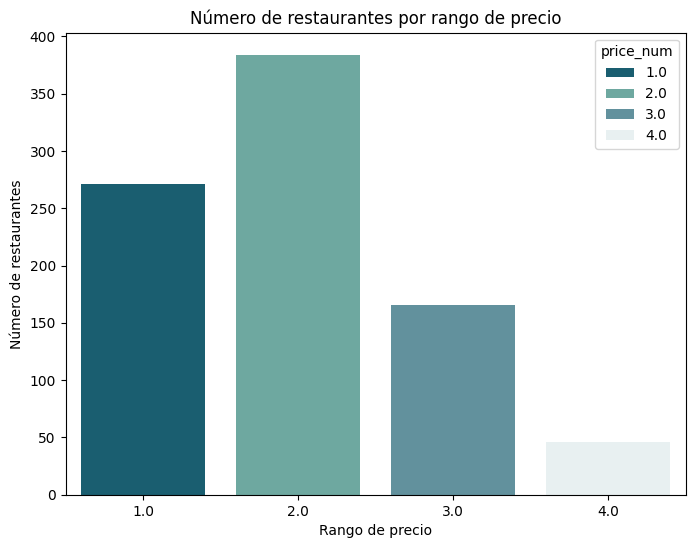

In [53]:
# grafico de barras restaurantes por rango de precio
plt.figure(figsize=(8, 6))
paleta_color = ['#0c677e','#64b2a7', '#5897a7', '#e7f1f2','#c2dcdd', '#5fafa4']
sns.countplot(data=df_clean, x='price_num', palette=paleta_color, hue='price_num')
plt.title('Número de restaurantes por rango de precio')
plt.xlabel('Rango de precio')
plt.ylabel('Número de restaurantes')
plt.show()

In [54]:
df_clean

id  \
0     K3ukx2e11xTRtYBU01dmrA   
1     UXHxLN3DcDGI57uDIfCuJA   
2     oxtMfBGmVNE18pFVuw7lFg   
3     ix8ifP1jQM9ektdVAs19sQ   
4     O4gh_gZPp1zW9QtC1aMHWw   
5     4GKmQ1rynV5RUSiaHHenWQ   
6     _tiVacKyfWZjOljFenLwVQ   
7     WqIBKxRUPXH3NqTViAHLxQ   
8     eVhl0Yu1ZRWRD2D1OQGsYg   
9     hZm7TunlrksQbgS0ssXbUg   
10    z1UW-zeI50bMEtGKFtrjmA   
11    Gx7zWzRfytSEmiz8a7Yw5w   
12    QQnw1bFxLyamuxn4giIy9g   
13    dYilRUDRuLck9_oC36O8DA   
14    wbxKj8E3ucAvky6DuoQZ8g   
15    nwY3CmIH75cN85cWBSaOAw   
16    scZfLg-ujWMEOUmFM_Qalg   
17    E3ReCbRJl7dDf1K_ZIznSw   
18    gmDna9f57vWTlSrdrEuVEg   
19    0EVWp_KyFdWC9VxJ7Sku1Q   
20    6vL6vsYoQ9h1SqDHbgEvrg   
21    vpMIsdom05-oOBeF6ajESg   
22    CbEQK2S7axhORTDX0id5FQ   
23    rkfps2EBXywsxWwACpHVeQ   
24    NtBdy9oTCc_wqGXionh2IA   
25    hZ66PVSH6Miscv2n8KxAEg   
26    Blv0tBolGOlOINW6v1Sp-Q   
27    5Rq4O0gzalOQ79NenZUyqg   
28    MfkZSdJ0w4-SOLJiEyHU5A   
29    Wy-J_av7_SUm7AuXp_ieUw   
30    EVGPTVYEU65_tvMEBRPIYg   
31    jp8y_UlQW8KE0yAcJ1Jubg   
32    RHeKcqEpV72fnUDUfjBFdg   
33    zUgXGynAq6_VptoNO50IhA   
34    rylo63njAl-oKkvZHgGJbQ   
35    SyVrRDKTGgVGNSNAbngxfw   
36    JnWk31PtaDGD3JfO9eyVkw   
37    V3btCvWa1flTBYt2YKea_g   
38    H2MNMjMwpBjkBMCc-Qo8zg   
39    zVCp5OmpE5Y_itQTALgBtg   
40    s9-OFJrBridRA7yYZ-5g3g   
41    M8dlhbSz62XnqJ4mP64L4w   
42    FC1HGH4fr6UbK4s0K54Asg   
43    LPVv4wk9gwGlIEdfZJRaHQ   
44    eGMNNkbahmLYYcvCxvTbeA   
45    t2wmQb6fCHXEXylvQ_b3lw   
46    Gv5X1-qLTGZbwoz829-Xxg   
47    wjTfEfdtzFZEbX6t7vC9JQ   
48    Obt7Njta79-1CNtNwhNXiw   
49    1h8-r9cLeXxW99HhlRUnlA   
100   Q9Xq-w4DhTeGA_csODsMCA   
101   1Blff5gcTYTbsNPA16m8nw   
102   XAoeEKu6DvERPbEZu73m8g   
103   07EtzVkziCory7__msq7oQ   
104   Cu1PIxhrplp09-eAwjmX5A   
105   XVHNF6zXA1IV052G7x48vA   
106   d881dT_RC64MOjXgH3fVuA   
107   akNp_x88QaQLoIJiuz36gw   
108   fV6YXmRerkHKARygmuaM6A   
109   iilZWFBmVXh0b9DkYzbERQ   
110   1eto1cFYJ2dNZfIsa6BMZQ   
111   M9QsnSNGdOzBqpGE0lcCaA   
112   MxtjG2Oln03fQPbCkYPt5g   
113   8llX2xvJjma2isxeow684A   
114   opz-z4k-WK0KsyyR1Vwg5A   
115   r7us7XCivJMmwZkAmbFG5g   
116   QAPNSxiFhcNSdmjM0dD8Tw   
117   x9AjrNAXK2H8MNeklHp9Qw   
118   YCIcD8zaluU7i9AfsoJplQ   
119   xvXGIah0QVNj2uCF7xd2EA   
120   XmZO_0VytcQbXiuVLA9lmg   
121   0FRl-hghB50Gw3CQnasq2Q   
122   IkTb-zHxAGNqeEvyTaln4g   
123   pUg9rFqeiSIWcWUqri_47w   
124   A5eRH3hfyWQeNOsEu_0dag   
125   Dzk_O70dBXoKcIQQeaOqyw   
126   6F_9_I63Gr10_6JUyZs6nQ   
127   GXUoFGyTH-iSHRO-NG2HZA   
128   uyaz8BMIp2n7lhSpjZ8quA   
129   Kh3YwPBPkuykk-WTl-7vlQ   
130   4YdRkZ1PB6P_FJMu73fsXQ   
131   7sxfMjjzpaldOTgQt8Dw4Q   
132   79IaCcuoIGLQ-5jDMWjJLA   
133   osJg1bKN96xGg9rIUsjLGA   
134   kIv1SwTV8-v8m67qDFWk1Q   
135   wik7B9NqYB2_q3Ublmbkew   
136   ylA34pU7W8Nx7Di0jVCz9A   
137   SsIMtruy7PQXZZQx3Fs0vA   
138   AsBZ1nQ4cD2wUKrdnFxlgQ   
139   qcJR_IqnKz3AJituEd8i1Q   
140   oxavRbReVd34pQjyBn14Vg   
141   _WzrhI273PHyyBS1oNKwMQ   
142   G7sq7f6Zqn5QsB7ShV29AA   
143   krKmADOKM1KjVm4F0rL8lQ   
144   9h9nMMvnINJWMt7TjJtePw   
145   fMk82DdXMJ_MULphyQM74w   
146   QdAazJBpTMa1bZzzLf7eLA   
147   KXv8dsRBmOmGwRTqX_Rr8A   
148   sAqV3GmjGLn0w5qUpZpvvQ   
149   vjtP6T-uOuF3ZVL88tKhYA   
150   E9o0PMAyrBar8NhBYJzyXA   
151   gr1H3g2FuAiZG-aj_Zm7PA   
152   WxbZSW4VFpb72fLTA95Fbw   
153   LD8i6FUVc97e43GWDyVa3A   
154   lLHQ6yxG8oEKbqLwzzYnDw   
155   6LbVL8LOVJGpytjzi4OkNw   
156   aIQK1sw9Prr-KdUu717vRw   
157   IGRrxE67NkYm3GnegZ3YWQ   
158   yxPn5n5se97lnNYN5JcAIw   
159   AkSrXE4YVuSur362P_1j-g   
160   ys97r_tdXZy1o8lwx3jl3A   
161   l6pWbM6do9bZ5_RT5euAFQ   
162   bphcfZUfxkGUV4l87BCIDg   
163   DSe5_ig3JFkmLs0Glzuisg   
164   yE9omO1xk19uk9kzmgW9Ew   
165   Dex34C02Qpsqp8F2iZ4VYw   
166   2SJpb38UqPLwfMukVG8NKg   
167   Llejx_lL8EZtJ27_s01tkQ   
168   LAGUcnPAa8ByFqq7J4WNjQ   
169   -vIOvnJhvEfWfUZeobqGqQ   
170   l9cOs1k4BMGHIbKCQJQ8rg   
171   XxQ-z1_U5ByzAn6IuYy4aA   
172   kG8t6gBsarlvsxIocFUkAQ   
173   nTsEr_CQqsA8zwLV4kT5nA   
174   jiTLUXjZYExf_G3YhH1I

<Axes: xlabel='distance', ylabel='rating'>

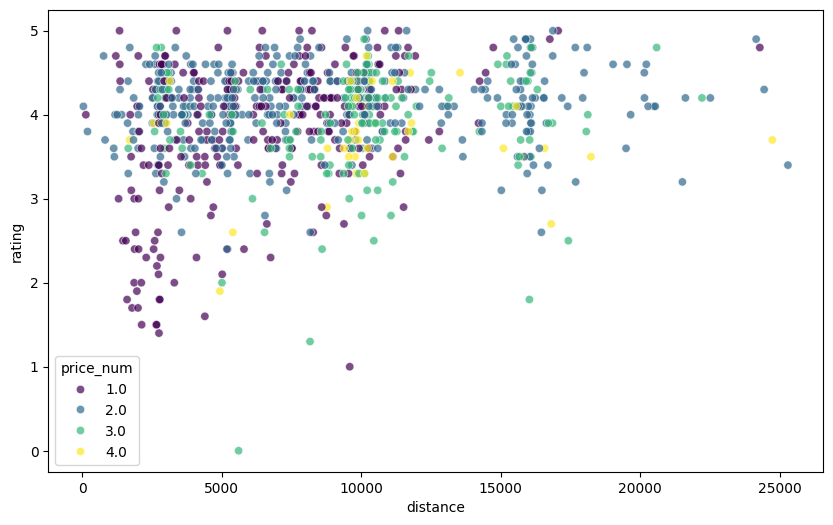

In [55]:
#restaurantes por distancia 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='distance', y='rating', hue='price_num', palette='viridis', alpha=0.7)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_39636\855418425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


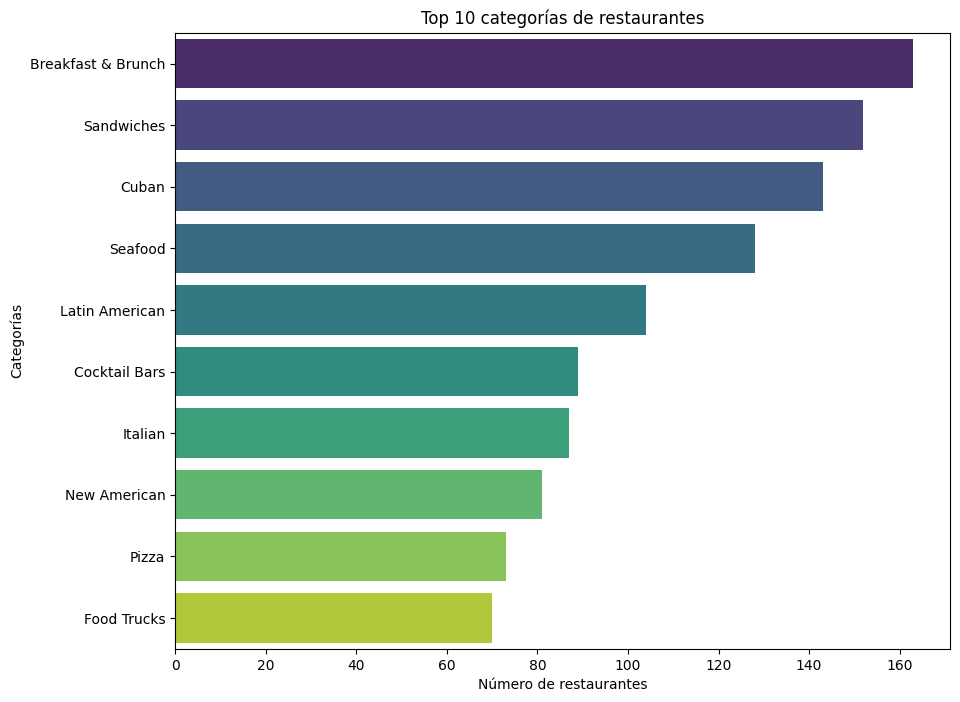

In [56]:
# grafico de barras horizontales de categorias 

from matplotlib.pyplot import xlabel, ylabel
plt.figure(figsize=(10, 8))
# Explode the list of categories into separate rows 
df_exploded = df_clean.explode('categories')
# Count the occurrences of each category    
category_counts = df_exploded['categories'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 categorías de restaurantes')
xlabel('Número de restaurantes')
ylabel('Categorías')      
plt.show() 

> El mercado esta dominado por comida de tipo breakfast and brunch, seguramente tendencia cultural y turismo asi como una fuerte presencia de comida latina especialmente de la gastronomia cubana. como cuarto lugar esta la comida de mar por la ubicación de miami costera asi como los bares por la vida nocturna turistica.  como estrategia se puede optar por nicho especifico ejm cuban bruch o comida mexicana posibles tendencias de salud vegana o vegetariana, nichos seguros con poca competencia como la comida italiana o hibridos con licores.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39636\1538944950.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.values, y=category_rating.index, palette='viridis')


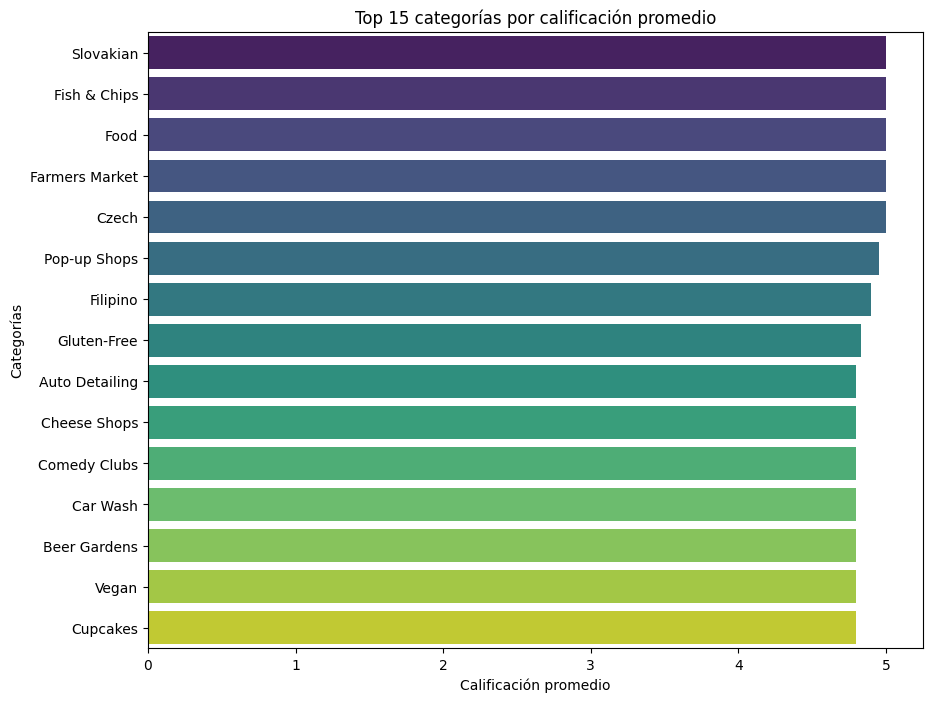

In [57]:
#categorias vs rating promedio
plt.figure(figsize=(10, 8))
# Explode the list of categories into separate rows 
df_exploded = df_clean.explode('categories')    
category_rating = df_exploded.groupby('categories')['rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=category_rating.values, y=category_rating.index, palette='viridis')
plt.title('Top 15 categorías por calificación promedio') 
xlabel('Calificación promedio')
ylabel('Categorías')
plt.show()

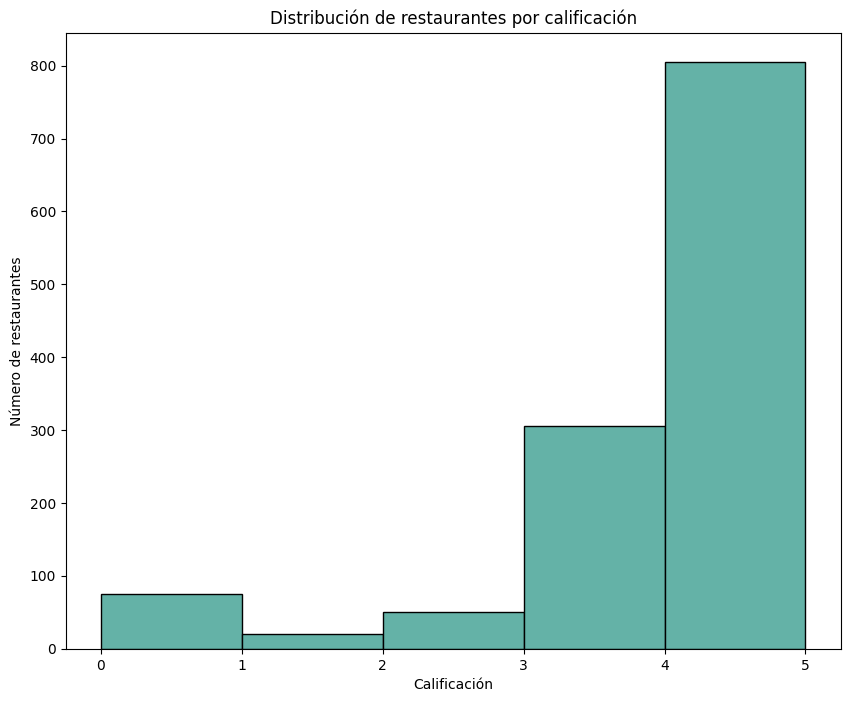

In [58]:
#restaurantes por calificación
plt.figure(figsize=(10, 8))
plt.hist(df_clean['rating'], bins=[0, 1, 2, 3, 4, 5], edgecolor='black', color='#64b2a7')
plt.title('Distribución de restaurantes por calificación')  
plt.xlabel('Calificación')
plt.ylabel('Número de restaurantes')    
plt.show() 


# Restos